In [5]:
import numpy as np
np.__version__

'1.21.6'

## 1. Perceptron (Logic Circuit)

In [6]:
def AND(x1, x2, b = -.7):
  x = np.array([x1, x2])
  w = np.array([.5, .5])

  # result = x*w # [x1 * w[0], x2 * x[1]]
  # result = np.sum(result)
  # result = result + b

  result = np.sum(x * w) + b

  # if result > 0 :
  #   return 1
  # else:
  #   return 0

  return 1 if result > 0 else 0

In [7]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

# result = list()
# for elem in X:
#   x1, x2 = elem
#   res = AND(x1, x2)
#   result.append(res)

# result = [AND(x1, x2) for x1, x2 in X]
result = [AND(*elem) for elem in X]
print(result)
# 결과해석: AND gate를 적용하였을 때 마지막만 1값임

[0, 0, 0, 1]


In [8]:
def NAND(x1, x2, b = .7):
  x = np.array([x1, x2])
  w = np.array([-.5, -.5])

  result = np.sum(x * w) + b

  return 1 if result > 0 else 0

In [9]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

result = [NAND(*elem) for elem in X]
print(result)

[1, 1, 1, 0]


In [10]:
def OR(x1, x2, b = -.2):
  x = np.array([x1, x2])
  w = np.array([.5, .5])
  result = np.sum(x * w) + b
  return 1 if result > 0 else 0

In [11]:
[OR(*elem) for elem in X]

[0, 1, 1, 1]

In [12]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  return AND(s1, s2)

[XOR(*elem) for elem in X]

[0, 1, 1, 0]

In [13]:
def get_x2(x1, w_idx, b_idx):
    w_points = np.array([
        [0.5, 0.5],
        [-0.5, -0.5],
        [0.5, 0.5]
    ])
    b_points = [-0.7, 0.7, -0.2]
    return (
        -b_points[b_idx] - w_points[w_idx][0] * x1
    ) / w_points[w_idx][1]

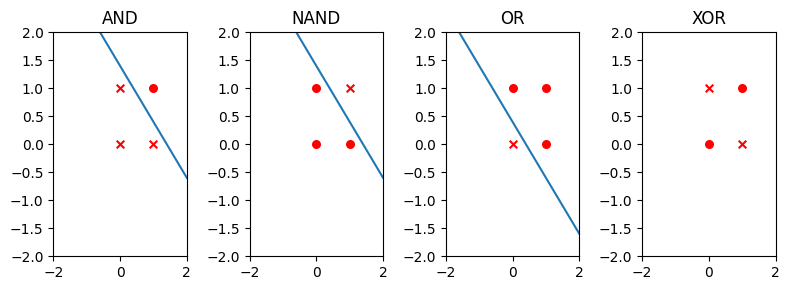

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 3), dpi =100)

#AND
ax1 = fig.add_subplot(1, 4, 1)
ax1. scatter([1], [1], s=30, c='r', marker = 'o')
ax1. scatter([0, 0, 1], [0, 1, 0], s=30, c='r', marker = 'x')
ax1.plot([-2, 2], [get_x2(-2, 0, 0), get_x2(2, 0, 0)])
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_title('AND')

#NAND
ax1 = fig.add_subplot(1, 4, 2)
ax1. scatter([1], [1], s=30, c='r', marker = 'x')
ax1. scatter([0, 0, 1], [0, 1, 0], s=30, c='r', marker = 'o')
ax1.plot([-2, 2], [get_x2(-2, 1, 1), get_x2(2, 1, 1)])
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_title('NAND')

#OR
ax1 = fig.add_subplot(1, 4, 3)
ax1. scatter([0], [0], s=30, c='r', marker = 'x')
ax1. scatter([1, 0, 1], [0, 1, 1], s=30, c='r', marker = 'o')
ax1.plot([-2, 2], [get_x2(-2, 2, 2), get_x2(2, 2, 2)])
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_title('OR')

#XOR
ax4 = fig.add_subplot(1, 4, 4)
ax4.scatter([0, 1], [0, 1], s=30, c="r", marker="o")
ax4.scatter([0, 1], [1, 0], s=30, c="r", marker="x")
ax4.set_xlim([-2, 2])
ax4.set_ylim([-2, 2])
ax4.set_title("XOR")

plt.tight_layout()
plt.show()

## Activation Function

In [15]:
x = np.array([-1, 0, 1])
x > 0

array([False, False,  True])

In [16]:
def step_function(x: np.array):
  y = x > 0
  return y.astype(np.int32)


In [17]:
x = np.array([-1, 0, 1])

step_function(x)
# array([False, False,  True])

array([0, 0, 1], dtype=int32)

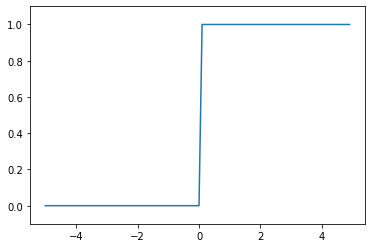

In [20]:
import matplotlib.pyplot as plt

x = np.arange(-5., 5., .1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()


In [21]:
def sigmoid(x):
  # y = (1 / np.exp(-x))
  # y = 1 / y
  # return y
  return 1 / (1 + np.exp(-x))

In [23]:
x = np.array([-1., 1., 2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

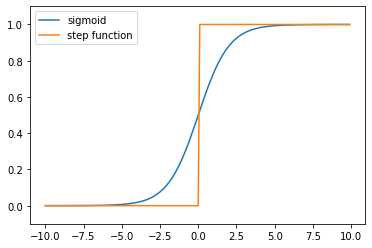

In [24]:
x = np.arange(-10., 10., .1)
y = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.ylim(-.1, 1.1)
plt.legend(["sigmoid", "step function"])
plt.show()

In [25]:
def ReLU(X):
  # alist = list()
  # for elem in X:
  #   if elem > 0:
  #     alist.append(elem)
  #   else:
  #     alist.append(0)
  # alist = np.array(alist)
  # alist = np.array([elem if elem > 0 else 0 for elem in X])
  # return alist

  return np.array([elem if elem > 0 else 0 for elem in X])

def LeakyReLU(X, a=0.1):
  return np.array([elem if elem > 0 else (elem * a) for elem in X])

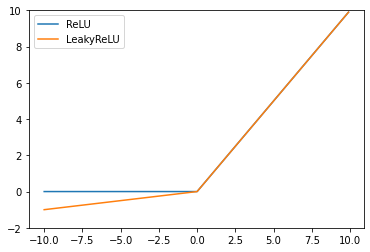

In [27]:
x = np.arange(-10., 10., .1)
y = ReLU(x)
y2 = LeakyReLU(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.ylim(-2., 10.)
plt.legend(['ReLU', 'LeakyReLU'])
plt.show()

In [28]:
def softmax(x):
  exp_x: np.array = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x
  return y

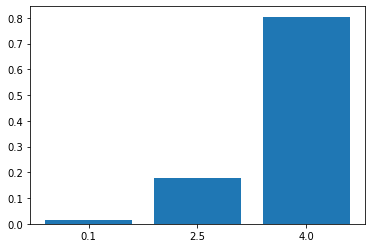

In [29]:
x = np.array([.1, 2.5, 4.])
y = softmax(x)

plt.bar(
    [str(elem) for elem in x],
    y
)

plt.show()

In [30]:
np.sum(softmax(x))

1.0

## N-d Array

In [31]:
A = np.array([1, 2, 3])
A

array([1, 2, 3])

In [32]:
A.shape

(3,)

In [33]:
B = np.array([
    [1, 2, 3, 4],
    [3, 4, 5, 6],
    [5, 6, 7, 8]
])

B.shape

(3, 4)

In [35]:
B[0][1], B[2, 2]

(2, 7)

In [36]:
np.dot(A, B)

array([22, 28, 34, 40])

In [37]:
B.T

array([[1, 3, 5],
       [2, 4, 6],
       [3, 5, 7],
       [4, 6, 8]])

In [38]:
B

array([[1, 2, 3, 4],
       [3, 4, 5, 6],
       [5, 6, 7, 8]])

In [39]:
A = np.array([
    [1],
    [2],
    [3],
    [4]
])

B.T * A

array([[ 1,  3,  5],
       [ 4,  8, 12],
       [ 9, 15, 21],
       [16, 24, 32]])

In [40]:
A = np.array([
    [1, 2],
    [3, 4]
])

B = np.array([
    [5, 6],
    [7, 8]
])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [41]:
A * B

array([[ 5, 12],
       [21, 32]])

## Neural Network - forward

In [42]:
import numpy as np 

X = np.array([1., .5])

W1 = np.array([
    [.1, .3, .5],
    [.2, .4, .6]
])
B1 = np.array([.1, .2 ,.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [44]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [45]:
Z1 = sigmoid(
    np.dot(X, W1) + B1
)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [47]:
class VanillaNeuralNetwork(object):
  def __init__(self):
    self.w1 = np.random.randn(2, 3)
    self.b1 = np.random.randn(3)

    self.w2 = np.random.randn(3, 2)
    self.b2 = np.random.randn(2)

    self.w3 = np.random.randn(2, 2)
    self.b3 = np.random.randn(2)

  def forward(self, x):
    a1 = np.dot(x, self.w1) + self.b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, self.w2) + self.b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, self.w3) + self.b3
    z3 = sigmoid(a3) # 항등 함수
    
    # y = sigmoid(a3)

    return z3

network = VanillaNeuralNetwork()

x = np.random.randn(2)
y = network.forward(x)

y

    

array([0.52881483, 0.76885055])

## Backpropagation

In [50]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [83]:
mnist_data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist_data.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [84]:
for elem in X_train[0]:
    print("".join(["1" if e > 0 else "0" for e in elem]))

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000001111111111110000
0000000011111111111111110000
0000000111111111111111100000
0000000111111111110000000000
0000000011111110110000000000
0000000001111100000000000000
0000000000011110000000000000
0000000000011110000000000000
0000000000001111110000000000
0000000000000111111000000000
0000000000000011111100000000
0000000000000001111100000000
0000000000000000011110000000
0000000000000011111110000000
0000000000001111111100000000
0000000000111111111000000000
0000000011111111110000000000
0000001111111111000000000000
0000111111111100000000000000
0000111111110000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


In [85]:
# [0, 255] -> [0, 1]
X_train, X_test = X_train / 255., X_test / 255.

In [86]:
from tensorflow.keras.utils import to_categorical

y_train_encoded, y_test_encoded = to_categorical(y_train), to_categorical(y_test)
y_train_encoded.shape, y_test_encoded.shape

((60000, 10), (10000, 10))

In [87]:
X_train_flatten, X_test_flatten = X_train.reshape([X_train.shape[0], -1]), X_test.reshape([X_test.shape[0], -1])
X_train_flatten.shape, X_test_flatten.shape

((60000, 784), (10000, 784))

## Activation Function

In [88]:
import numpy as np

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

## Loss

In [89]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(
        np.log(y[np.arange(batch_size), t] + 1e-7) / batch_size
    )

## Numerical Gradient

In [90]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.shape[0]):
        tmp_val = x[idx]

        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
    return grad

## TwoLayerNet

In [107]:
class TwoLayerNet:
    # typing hint
    def __init__(self, input_size: int, hidden_size: int, output_size: int, weight_init_std: float = 0.01):
        self.params = dict()
        self.params["W1"] = np.random.randn(input_size, hidden_size) * weight_init_std
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = np.random.randn(hidden_size, output_size) * weight_init_std
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)

        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x: 입력 데이터, t: 정답 데이터
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def numerical_gradient(self, x: np.array, t) -> dict:
        loss_W = lambda W: self.loss(x, t)

        # grads = dict()
        # grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        # grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        # grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        # grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        return {
            _key: numerical_gradient(loss_W, self.params[_key]) for _key in (
                "W1", "b1", "W2", "b2"
            )
        }

    def gradient(self, x, t):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        grads = dict()
        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads["W2"] = np.dot(z1.T, dy)
        grads["b2"] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads["W1"] = np.dot(x.T, dz1)
        grads["b1"] = np.sum(dz1, axis=0)
        
        return grads

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) # Neural Network가 예측한 0~9 사이의 숫자
        t = np.argmax(t, axis=1)

        acc = np.sum(y == t) / float(x.shape[0])
        return acc

In [65]:
# one-hot encoding
a = np.array([0.1, 0.3, 0.6])
np.argmax(a)

2

In [69]:
a = np.array([1, 2, 3])
b = np.array([3, 2, 3])

c = a == b
c

array([False,  True,  True])

In [70]:
np.sum(c)

2

In [77]:
mask = np.random.choice(10, 3)
a = np.array([i+1 for i in range(10)])
mask, a

(array([4, 3, 9]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [78]:
a[mask]

array([ 5,  4, 10])

---

In [92]:
from tqdm.auto import tqdm
import time

In [108]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
network

In [109]:
dir(network)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'accuracy',
 'gradient',
 'loss',
 'numerical_gradient',
 'params',
 'predict']

In [122]:
# epoch
iters_num = 1000
train_size = X_train_flatten.shape[0] # 60000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

history = dict(
    train_acc = list(),
    test_acc = list()
)

start_time = time.time()

for i in tqdm(range(iters_num)):
  # Batch 데이터 만들기
  # SGD(Stochastic Gradient Descent) - Mini Batch
  batch_mask = np.random.choice(train_size, batch_size)
  X_batch = X_train_flatten[batch_mask]
  y_batch = y_train_encoded[batch_mask]

  # Train Model
  grads = network.gradient(X_batch, y_batch)
  # network.params["W1"] = network.params["W1"] -learning_rate * grads["W1"]
  # network.params["W2"] = network.params["W2"] -learning_rate * grads["W2"]
  # network.params["b1"] = network.params["b1"] -learning_rate * grads["b1"]
  # network.params["b2"] = network.params["b2"] -learning_rate * grads["b2"]

  for _key in ("W1", "W2", "b1", "b2"):
    network.params[_key] -= learning_rate * grads[_key]

  train_acc = network.accuracy(X_batch, y_batch)
  test_acc = network.accuracy(X_test_flatten, y_test_encoded)

  # log history
  history['train_acc'].append(train_acc)
  history['test_acc'].append(test_acc)

train_time = "%.4f" % (time.time() - start_time)
print("time occured: ", train_time)




# # epoch
# iters_num = 1000
# train_size = X_train_flatten[0] # 60000
# batch_size = 100
# learning_rate = 0.1

# history = dict(
#     train_acc = list(),
#     test_acc = list()
# )

# start_time = time.time()

# for i in range(iters_num):

#   # Train Model

#   # log history
#   history['train_acc'].append(0.8)
#   history['test_acc'].append(0.7)

# train_time = "%.4f" % (time.time() - start_time)
# print("time occured: ", train_time)

  0%|          | 0/1000 [00:00<?, ?it/s]

time occured:  120.6452


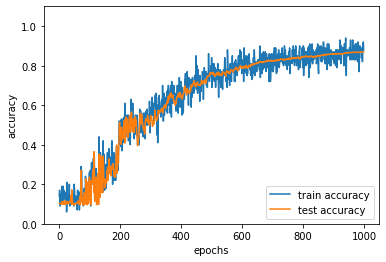

In [124]:
# plot history
import matplotlib.pyplot as plt

x = np.arange(len(history["train_acc"]))
plt.plot(x, history["train_acc"], label="train accuracy")
plt.plot(x, history["test_acc"], label="test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.1)
plt.legend(loc="lower right")

plt.show()

In [123]:
history["train_acc"][-1], history["test_acc"][-1]

(0.88, 0.8683)

In [125]:
network.accuracy(X_train_flatten, y_train_encoded)

0.8612

## Computational Graph

In [126]:
class AddLayer:
  def __init__(self):
    pass
  def forward(self, x, y):
    return x + y

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy

class MultiLayer:
  def __init__(self):
    self.x = None
    self.y = None
  
  def forward(self, x, y):
    self.x = x
    self.y = y
    return x * y
  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx, dy

In [127]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MultiLayer()
mul_tax_layer = MultiLayer()

apple_price = mul_apple_layer.forward(apple, apple_num) # apple * apple_num
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [130]:
d_price = 1
d_apple_price, d_tax = mul_tax_layer.backward(d_price)
d_apple, d_apple_num = mul_apple_layer.backward(d_apple_price)

print("d_apple_price: ", d_apple_price)
print("d_tax: ", d_tax)
print("d_apple: ", d_apple)
print("d_apple_num: ", d_apple_num)

d_apple_price:  1.1
d_tax:  200
d_apple:  2.2
d_apple_num:  110.00000000000001


## Layer Classes

In [131]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b

    self.x = None
    self.dW = None
    self.db = None
    
    def forward(self, x):
      self.x = x
      out = np.dot(x, self.W) + self.b
      return out

    def backward(self, dout):
      dx = np.dot(dout, self.W.T)
      self.dW = np.dot(self.x.T, dout)
      self.db = np.sum(dout, axis = 0)
      return dx

In [139]:
x = np.array([-1, 0, 1])
chk = (x <= 0)

In [138]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

class LeakyRelu:
    def __init__(self, a=.1):
        self.mask = None
        self.a = a

    def forward(self, x):
        self.mask = (x <= 0)
        out = np.array([
            elem if elem > 0 else elem * self.a for elem in x
        ])
        return out

    def backward(self, dout):
        dout[self.mask] = self.a
        dx = dout
        return dx

In [137]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

## TwoLayerNet (Backpropagation)

In [133]:
a = dict()
a["key1"] = 1
a["aoegnaeogn"] = 2
a["key3"] = 3
a["key4"] = 4
a

{'key1': 1, 'aoegnaeogn': 2, 'key3': 3, 'key4': 4}

In [134]:
for elem in a.items():
    print(elem)

('key1', 1)
('aoegnaeogn', 2)
('key3', 3)
('key4', 4)


In [135]:
alist = [[1, 2], [3, 4]]

for _, x2 in alist:
    print(x2)

2
4


In [136]:
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size: int, hidden_size: int, output_size: int, weight_init_std: float = 0.01):
        self.params = dict()
        self.params["W1"] = weight_init_std + np.radom.randn(input_size, hidden_size)
        self.params["W2"] = weight_init_std + np.radom.randn(hidden_size, output_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["b2"] = np.zeros(output_size)
        # self.output_layer = None

        self.layers = OrderedDict()
        self.layers["Affine_1"] = Affine(self.params["W1"], self.params["b1"])
        self.layers["Relu_1"] = Relu()
        self.layers["Affine_2"] = Affine(self.params["W2"], self.params["b2"])
        self.output_layer = SoftmaxWithLoss()

    def predict(self, x):
        # x = self.layers["Affine_1"].forward(x)
        # x = self.layers["Relu_1"].forward(x)
        # x = self.layers["Affine_2"].forward(x)
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.output_layer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        acc = np.sum(y == t) / float(x.shape[0])
        return acc

    def gradient(self, x, t):

        _ = self.loss(x, t)
        d_out = 1
        d_out = self.output_layer.backward(d_out)

        layers = list(self.layers.values())
        for layer in reversed(layers):
            d_out = layer.backward(d_out)

        grads = dict()
        # grads["W1"] = self.layers["Affine_1"].dw
        # grads["b1"] = self.layers["Affine_1"].db
        # grads["W2"] = self.layers["Affine_2"].dw
        # grads["b2"] = self.layers["Affine_2"].db
        for i in (1, 2):
            for _key in ("W", "b"):
                aff_layer = self.layers[f"Affine_{i}"]
                grads[f"{_key}{i}"] = aff_layer.dw if _key == "W" else aff_layer.db
        return grads

